In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator, FuncFormatter
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings('ignore')

In [112]:
chomage_usa = pd.read_csv('UNRATE.csv')
print("Données initiales :\n")
print(chomage_usa.head())
print("\nInformations sur les données initiales :")
chomage_usa.info()

Données initiales :

  observation_date  UNRATE
0       1948-01-01     3.4
1       1948-02-01     3.8
2       1948-03-01     4.0
3       1948-04-01     3.9
4       1948-05-01     3.5

Informations sur les données initiales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  925 non-null    object 
 1   UNRATE            925 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.6+ KB


In [113]:
chomage_usa['observation_date'] = pd.to_datetime(chomage_usa['observation_date'])
chomage_usa.info()

chomage_usa.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  925 non-null    datetime64[ns]
 1   UNRATE            925 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.6 KB


,observation_date,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
920,2024-09-01,4.1
921,2024-10-01,4.1
922,2024-11-01,4.2
923,2024-12-01,4.1


In [114]:
chomage_usa.describe()

,observation_date,UNRATE
count,925,925.000000
mean,1986-07-01 19:21:20.432432448,5.681622
min,1948-01-01 00:00:00,2.500000
25%,1967-04-01 00:00:00,4.400000
50%,1986-07-01 00:00:00,5.500000
75%,2005-10-01 00:00:00,6.700000
max,2025-01-01 00:00:00,14.800000
std,NaN,1.708949


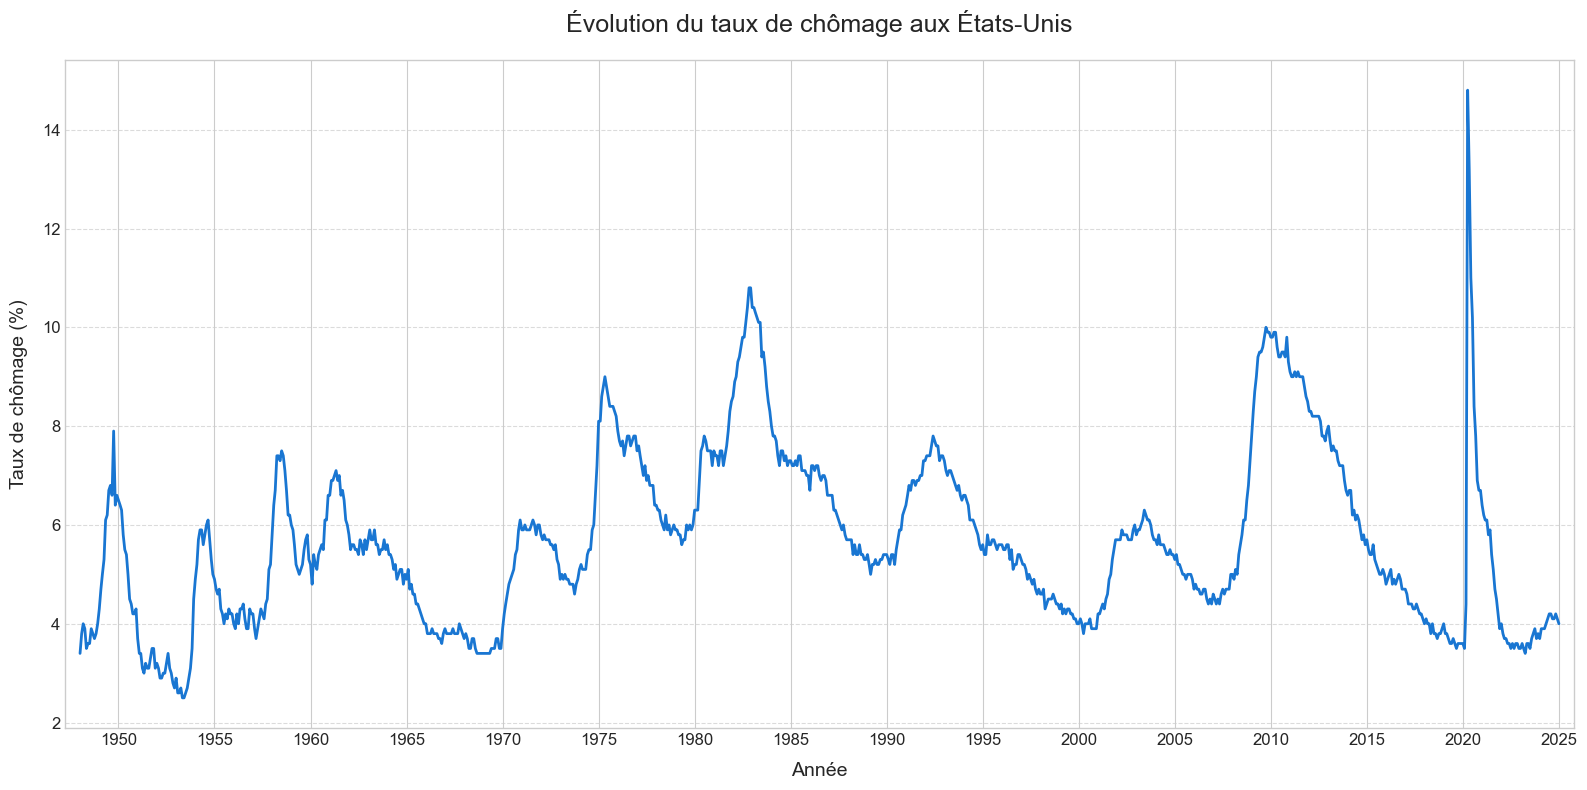

In [115]:
plt.figure(figsize=(16, 8))  

plt.style.use('seaborn-v0_8-whitegrid')

sns.lineplot(data=chomage_usa, x='observation_date', y='UNRATE', linewidth=2, color='#1976D2')

plt.title('Évolution du taux de chômage aux États-Unis', fontsize=18, pad=20)
plt.xlabel('Année', fontsize=14, labelpad=10)
plt.ylabel('Taux de chômage (%)', fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


years = mdates.YearLocator(base=5) 
years_fmt = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(years_fmt)

plt.margins(x=0.01)

plt.grid(axis='y', linestyle='--', alpha=0.7)



plt.tight_layout()
plt.show()

# ***Regression Polynomiale***

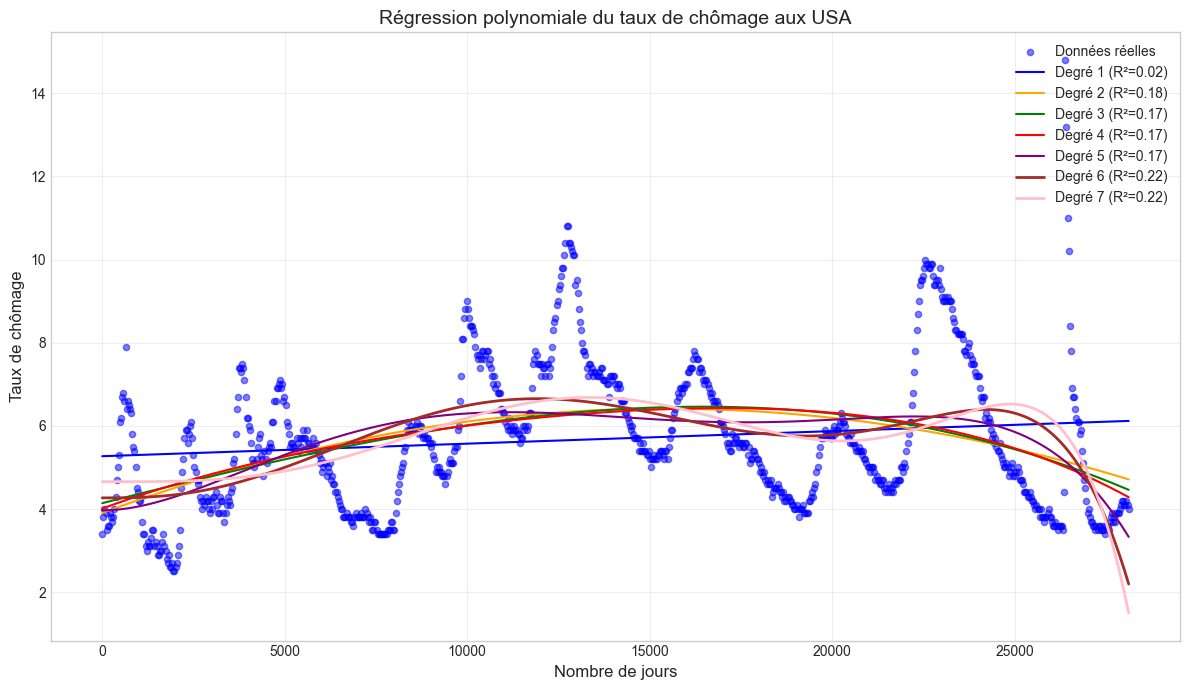

Scores R² pour différents degrés de régression :
Degré 6: R² = 0.2179
Degré 7: R² = 0.2160
Degré 2: R² = 0.1766
Degré 5: R² = 0.1745
Degré 3: R² = 0.1723
Degré 4: R² = 0.1653
Degré 1: R² = 0.0228

Meilleur modèle: Polynôme de degré 6 avec R² = 0.2179


In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt

chomage_usa['date_num'] = (chomage_usa['observation_date'] - chomage_usa['observation_date'].min()).dt.days

X = chomage_usa[['date_num']]
y = chomage_usa['UNRATE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = [1, 2, 3, 4, 5, 6, 7]
scores = {}

plt.figure(figsize=(12, 7))

plt.scatter(X, y, color='blue', alpha=0.5, s=20, label='Données réelles')

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

for i, d in enumerate(degrees):
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_pred = model.predict(X_test_poly)
    score = r2_score(y_test, y_pred)
    scores[d] = score
    
    X_sorted = np.sort(X.values, axis=0)
    X_poly_sorted = poly.transform(X_sorted)
    y_poly_pred = model.predict(X_poly_sorted)
    
    lw = 2 if d in [6, 7] else 1.5
    plt.plot(X_sorted, y_poly_pred, color=colors[i], linewidth=lw, 
             label=f'Degré {d} (R²={score:.2f})')

plt.xlabel('Nombre de jours', fontsize=12)
plt.ylabel('Taux de chômage', fontsize=12)
plt.title('Régression polynomiale du taux de chômage aux USA', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

print("Scores R² pour différents degrés de régression :")
for d, score in sorted(scores.items(), key=lambda x: x[1], reverse=True):
    print(f"Degré {d}: R² = {score:.4f}")

best_degree = max(scores, key=scores.get)
print(f"\nMeilleur modèle: Polynôme de degré {best_degree} avec R² = {scores[best_degree]:.4f}")

# ***Analyse Serie chronologique***

In [117]:
# %pip install statsmodels
import statsmodels.api as sm

Analyse de la décomposition saisonnière:
- Tendance: Min=2.71, Max=10.25, Amplitude=7.54
- Saisonnalité: Min=-0.052, Max=0.097, Amplitude=0.149
- Résidus: Min=-3.20, Max=7.26, Écart-type=0.423


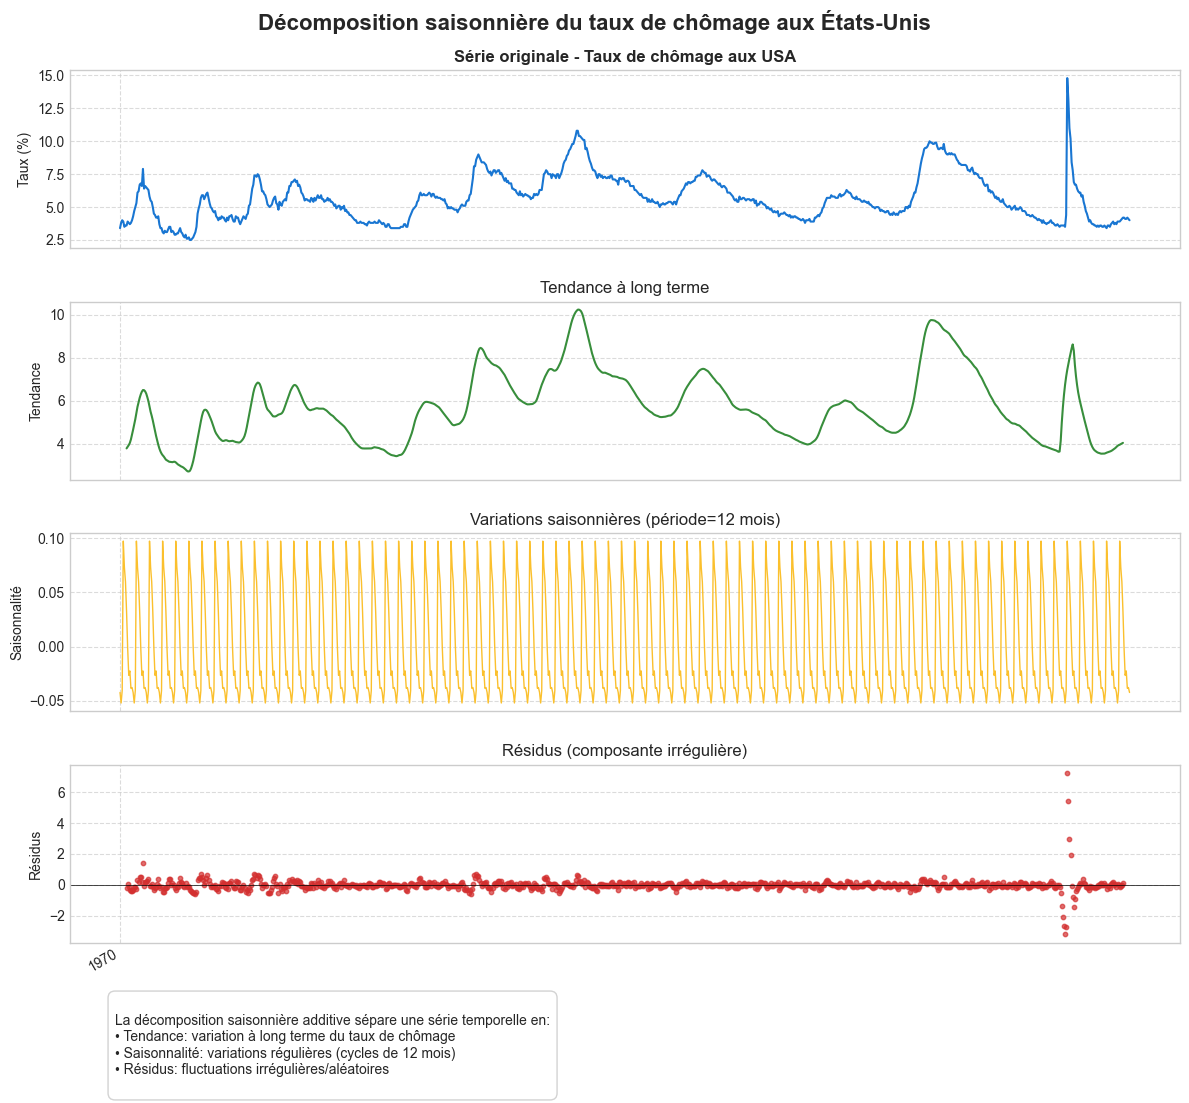

In [118]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(chomage_usa['UNRATE'], model='additive', period=12)


plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True, dpi=100)

colors = ['#1976D2', '#388E3C', '#FBC02D', '#D32F2F']
title_size = 12
label_size = 10


axes[0].plot(chomage_usa.index, chomage_usa['UNRATE'], color=colors[0], linewidth=1.5)
axes[0].set_ylabel('Taux (%)', fontsize=label_size)
axes[0].set_title('Série originale - Taux de chômage aux USA', fontsize=title_size, fontweight='bold')
axes[0].grid(True, linestyle='--', alpha=0.7)

axes[1].plot(chomage_usa.index, decomp.trend, color=colors[1], linewidth=1.5)
axes[1].set_ylabel('Tendance', fontsize=label_size)
axes[1].set_title('Tendance à long terme', fontsize=title_size)
axes[1].grid(True, linestyle='--', alpha=0.7)

axes[2].plot(chomage_usa.index, decomp.seasonal, color=colors[2], linewidth=1)
axes[2].set_ylabel('Saisonnalité', fontsize=label_size)
axes[2].set_title('Variations saisonnières (période=12 mois)', fontsize=title_size)
axes[2].grid(True, linestyle='--', alpha=0.7)

axes[3].scatter(chomage_usa.index, decomp.resid, color=colors[3], s=10, alpha=0.7)
axes[3].set_ylabel('Résidus', fontsize=label_size)
axes[3].set_title('Résidus (composante irrégulière)', fontsize=title_size)
axes[3].grid(True, linestyle='--', alpha=0.7)
axes[3].axhline(y=0, color='black', linestyle='-', linewidth=0.5)

years = mdates.YearLocator(5)  
years_fmt = mdates.DateFormatter('%Y')
axes[3].xaxis.set_major_locator(years)
axes[3].xaxis.set_major_formatter(years_fmt)
fig.autofmt_xdate()

text = """
La décomposition saisonnière additive sépare une série temporelle en:
• Tendance: variation à long terme du taux de chômage
• Saisonnalité: variations régulières (cycles de 12 mois)
• Résidus: fluctuations irrégulières/aléatoires
"""
fig.text(0.1, -0.10, text, fontsize=10, 
         bbox=dict(facecolor='white', edgecolor='lightgray', boxstyle='round,pad=0.5'))

fig.suptitle('Décomposition saisonnière du taux de chômage aux États-Unis', 
             fontsize=16, y=0.98, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(hspace=0.3, top=0.92)



print("Analyse de la décomposition saisonnière:")
print(f"- Tendance: Min={decomp.trend.min():.2f}, Max={decomp.trend.max():.2f}, Amplitude={decomp.trend.max()-decomp.trend.min():.2f}")
print(f"- Saisonnalité: Min={decomp.seasonal.min():.3f}, Max={decomp.seasonal.max():.3f}, Amplitude={decomp.seasonal.max()-decomp.seasonal.min():.3f}")
print(f"- Résidus: Min={decomp.resid.min():.2f}, Max={decomp.resid.max():.2f}, Écart-type={decomp.resid.std():.3f}")

# ***Prophet***

In [119]:
#!pip install prophet

14:29:45 - cmdstanpy - INFO - Chain [1] start processing
14:29:48 - cmdstanpy - INFO - Chain [1] done processing


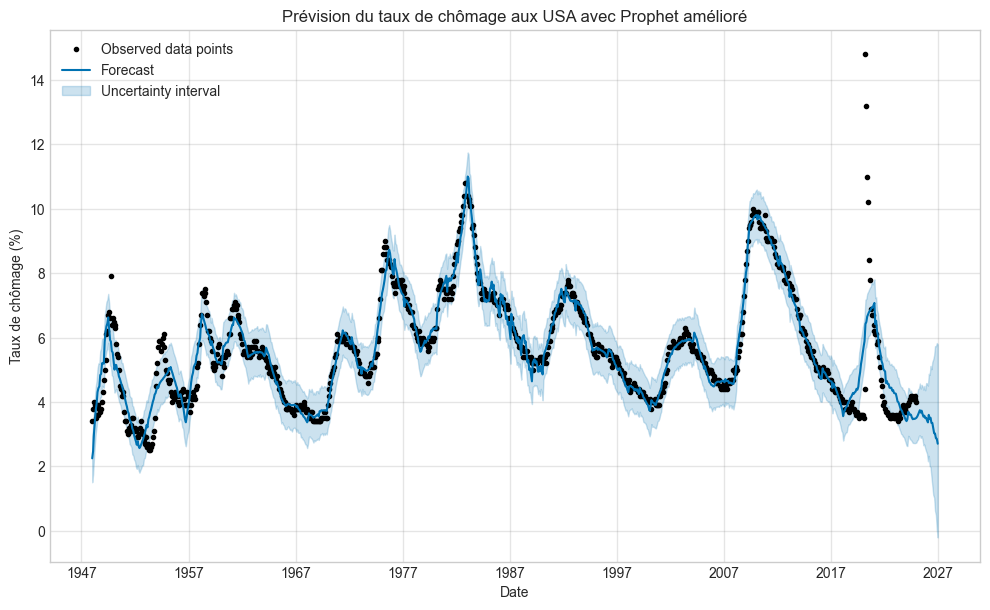

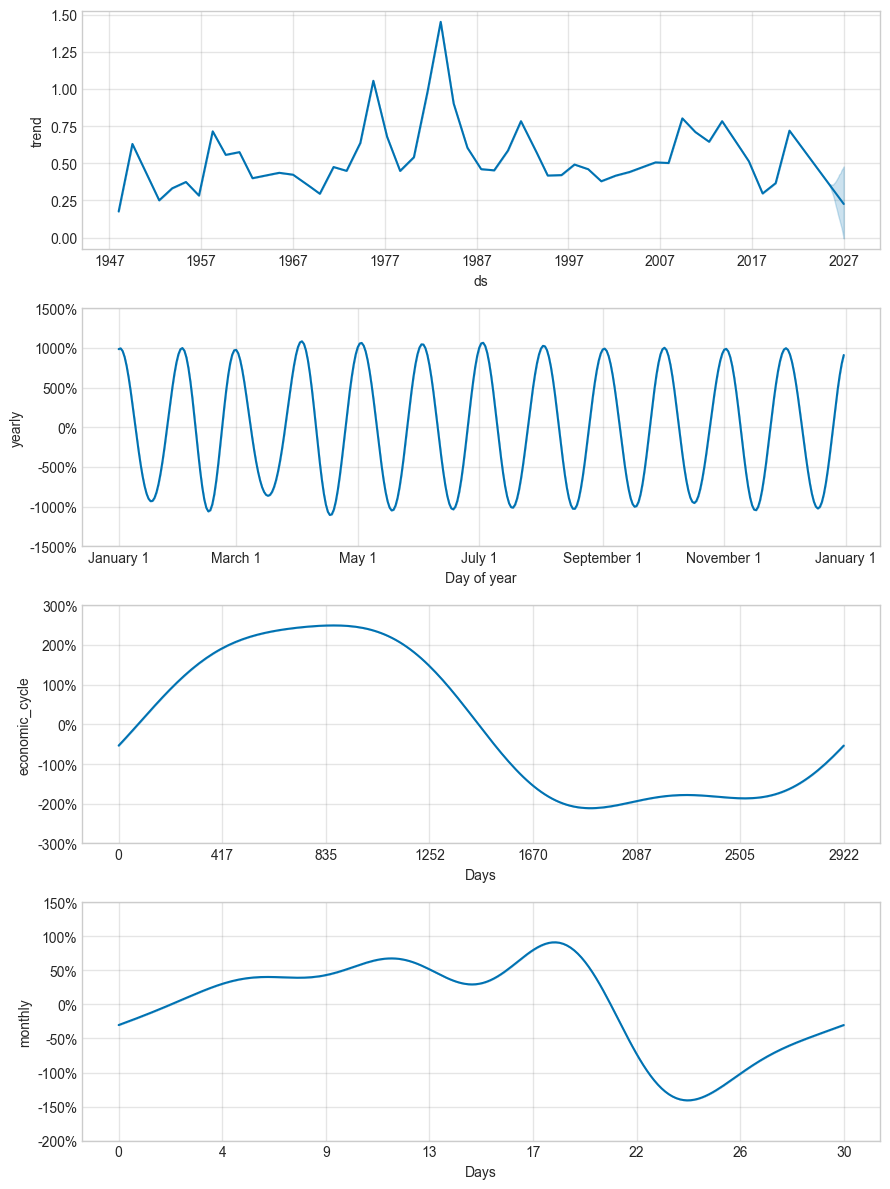

MAE: 0.323
RMSE: 0.581
MAPE: 6.276%


In [120]:
from prophet import Prophet
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

chomage_usa_reset = chomage_usa.reset_index()
df = chomage_usa_reset[['observation_date', 'UNRATE']].rename(columns={'observation_date': 'ds', 'UNRATE': 'y'})

model = Prophet(
    changepoint_prior_scale=0.5,      
    changepoint_range=0.95,           
    n_changepoints=50,               
    seasonality_prior_scale=10,       
    seasonality_mode='multiplicative',
    yearly_seasonality=20,           
)

model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

model.add_seasonality(name='economic_cycle', period=365.25*8, fourier_order=3)

model.fit(df)

future = model.make_future_dataframe(periods=24, freq='MS') 

forecast = model.predict(future)

prophet_forecast = forecast.copy()    


fig = model.plot(forecast, include_legend=True)
plt.title("Prévision du taux de chômage aux USA avec Prophet amélioré")
plt.xlabel("Date")
plt.ylabel("Taux de chômage (%)")
plt.show()

fig2 = model.plot_components(forecast)
plt.tight_layout()
plt.show()

y_true = df['y'].values
y_pred = forecast['yhat'][:len(y_true)]

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAPE: {mape:.3f}%")

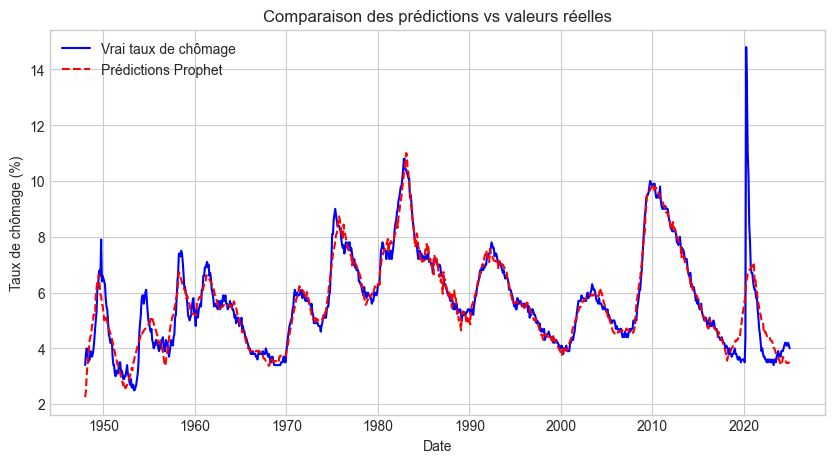

In [121]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df['ds'], y_true, label='Vrai taux de chômage', color='blue')
plt.plot(df['ds'], y_pred, label='Prédictions Prophet', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Taux de chômage (%)')
plt.legend()
plt.title('Comparaison des prédictions vs valeurs réelles')
plt.show()


# *Sauvegarde du modele Prophet*

In [122]:
import os
import joblib  

from prophet import Prophet 

prophet_model_filename = 'mon_modele_prophet_entraine.pkl'
models_dir = 'trained_models_jupyter'

os.makedirs(models_dir, exist_ok=True)

full_prophet_path = os.path.join(models_dir, prophet_model_filename)

try:
    joblib.dump(model, full_prophet_path)
    print(f"Modèle Prophet sauvegardé avec succès dans : {full_prophet_path}")
except Exception as e:
    print(f" Erreur lors de la sauvegarde du modèle Prophet : {e}")


Modèle Prophet sauvegardé avec succès dans : trained_models_jupyter\mon_modele_prophet_entraine.pkl


# ***ARIMA***

# *Test de stationnarité avec le test de Dickey-Fuller augmenté (ADF)*

In [123]:
from statsmodels.tsa.stattools import adfuller


def adf_test(ts):
    result = adfuller(ts)
    print("p-value:", result[1])

    if result[1] < 0.05:
        print("=> The series is stationary (reject H0)")
    else:
        print("=> The series is non-stationary (fail to reject H0)")
        
adf_test(df['y'])

p-value: 0.00196613652874105
=> The series is stationary (reject H0)


In [124]:
#! pip install pmdarima

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1009.548, Time=5.55 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1006.735, Time=0.12 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1008.749, Time=1.29 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1008.586, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1004.737, Time=0.12 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1007.969, Time=0.60 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1007.920, Time=0.66 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1008.512, Time=4.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1007.514, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1007.399, Time=0.69 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1003.775, Time=2.63 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=1005.224, Time=2.60 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1005.191, Time=2.93 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=1006.069, Time=3.96 sec
 ARIMA(2,1,1)(0,0,0

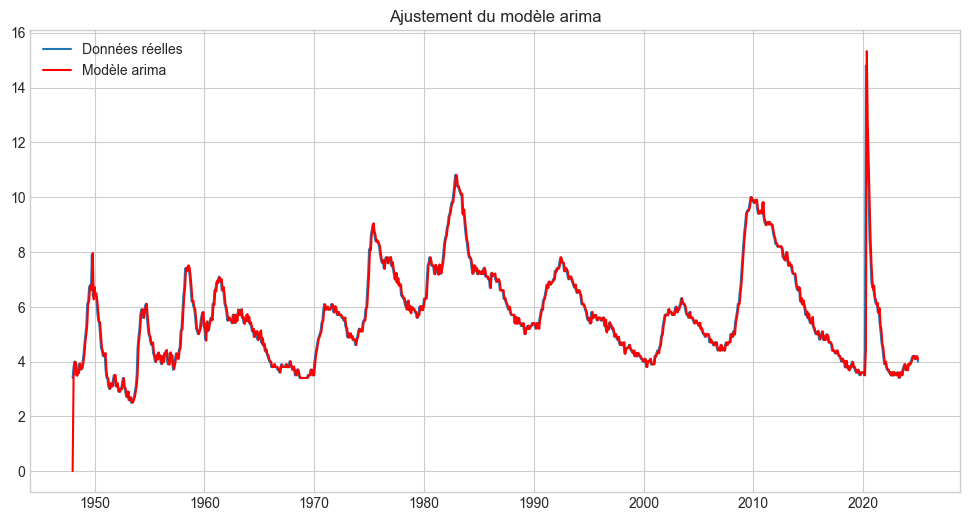

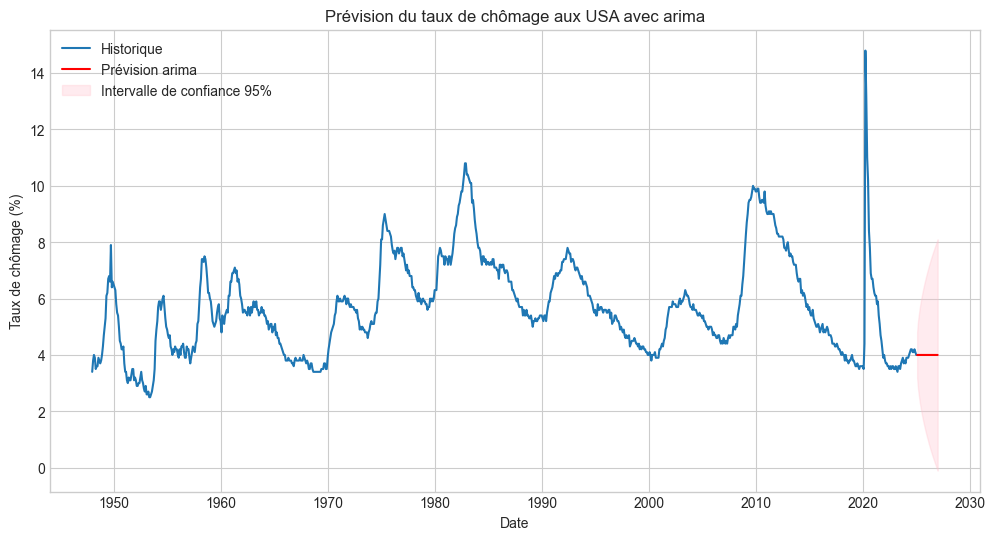


Métriques de performance du modèle arima:
MAE (Erreur Absolue Moyenne) : 0.167
RMSE (Racine de l'Erreur Quadratique Moyenne) : 0.415
MAPE (Erreur Moyenne en %) : 2.89%
R² Score : 0.941

 Prévisions pour les prochains mois:
          date  prediction  lower_ci  upper_ci
925 2025-02-01    3.997909  3.185048  4.810769
926 2025-03-01    3.999529  2.817963  5.181096
927 2025-04-01    3.998273  2.558382  5.438165
928 2025-05-01    3.999247  2.327318  5.671175
929 2025-06-01    3.998492  2.132345  5.864640
930 2025-07-01    3.999077  1.950508  6.047645
931 2025-08-01    3.998624  1.787330  6.209918
932 2025-09-01    3.998975  1.632711  6.365239
933 2025-10-01    3.998703  1.489516  6.507890
934 2025-11-01    3.998914  1.352677  6.645150
935 2025-12-01    3.998750  1.223580  6.773920
936 2026-01-01    3.998877  1.099495  6.898259
937 2026-02-01    3.998779  0.981043  7.016514
938 2026-03-01    3.998855  0.866675  7.131035
939 2026-04-01    3.998796  0.756628  7.240964
940 2026-05-01    3.9988

In [125]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



auto_model = auto_arima(df['y'], seasonal=True, m=12,
                      trace=True, 
                      stepwise=True,
                      max_p=5, max_q=5,
                      suppress_warnings=True,
                      error_action="ignore")
print(auto_model.summary())

p, d, q = auto_model.order
P, D, Q, m = auto_model.seasonal_order if hasattr(auto_model, 'seasonal_order') else (0, 0, 0, 0)

if m > 0:
    model = sm.tsa.SARIMAX(df['y'], order=(p, d, q), seasonal_order=(P, D, Q, m))
    model_type = "arima"
else:
    model = sm.tsa.ARIMA(df['y'], order=(p, d, q))
    model_type = "ARIMA"
    
results = model.fit()
print(results.summary())

df['prévision'] = results.fittedvalues
plt.figure(figsize=(12, 6))
plt.plot(df['ds'], df['y'], label="Données réelles")
plt.plot(df['ds'], df['prévision'], label=f"Modèle {model_type}", color='red')
plt.title(f"Ajustement du modèle {model_type}")
plt.legend()
plt.grid(True)
plt.show()

steps = 24 
forecast_index = pd.date_range(start=df['ds'].iloc[-1], periods=steps+1, freq='MS')[1:]
forecast = results.get_forecast(steps=steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

plt.figure(figsize=(12, 6))
plt.plot(df['ds'], df['y'], label='Historique')
plt.plot(forecast_index, forecast_mean, label=f'Prévision {model_type}', color='red')
plt.fill_between(forecast_index, 
                 forecast_ci.iloc[:, 0], 
                 forecast_ci.iloc[:, 1], 
                 color='pink', alpha=0.3, label='Intervalle de confiance 95%')
plt.title(f"Prévision du taux de chômage aux USA avec {model_type}")
plt.xlabel("Date")
plt.ylabel("Taux de chômage (%)")
plt.legend()
plt.grid(True)
plt.show()

y_real = df['y'].iloc[d:] 
y_pred = results.fittedvalues.iloc[d:]
mae = mean_absolute_error(y_real, y_pred)
rmse = np.sqrt(mean_squared_error(y_real, y_pred))
mape = np.mean(np.abs((y_real - y_pred) / y_real)) * 100
r2 = r2_score(y_real, y_pred)

print(f"\nMétriques de performance du modèle {model_type}:")
print(f"MAE (Erreur Absolue Moyenne) : {mae:.3f}")
print(f"RMSE (Racine de l'Erreur Quadratique Moyenne) : {rmse:.3f}")
print(f"MAPE (Erreur Moyenne en %) : {mape:.2f}%")
print(f"R² Score : {r2:.3f}")

forecast_df = pd.DataFrame({
    'date': forecast_index,
    'prediction': forecast_mean,
    'lower_ci': forecast_ci.iloc[:, 0],
    'upper_ci': forecast_ci.iloc[:, 1]
})

print("\n Prévisions pour les prochains mois:")
print(forecast_df)

In [126]:
import os
import joblib

# Créer le dossier s'il n'existe pas
os.makedirs("trained_models_jupyter", exist_ok=True)

# Sauvegarder le modèle
joblib.dump(results, "trained_models_jupyter/modele_ARIMA.pkl")


['trained_models_jupyter/modele_ARIMA.pkl']

# ***COMPARAISON DES MODÈLES***

In [127]:
print("="*80)
print("Comparaison entre Prophet et", model_type)
print("="*80)

y_true = df['y'].values

y_pred_prophet = prophet_forecast['yhat'].values[:len(y_true)]

mae_prophet  = mean_absolute_error(y_true, y_pred_prophet)
rmse_prophet = np.sqrt( mean_squared_error(y_true, y_pred_prophet) )
mape_prophet = np.mean( np.abs((y_true - y_pred_prophet) / y_true) ) * 100
r2_prophet   = r2_score(y_true, y_pred_prophet)

y_pred_sarima = results.fittedvalues.iloc[d:].values
y_true_sarima = y_true[d:]

min_len = min(len(y_true_sarima), len(y_pred_sarima))
y_true_sarima = y_true_sarima[:min_len]
y_pred_sarima = y_pred_sarima[:min_len]

mae_sarima  = mean_absolute_error(y_true_sarima, y_pred_sarima)
rmse_sarima = np.sqrt( mean_squared_error(y_true_sarima, y_pred_sarima) )
mape_sarima = np.mean( np.abs((y_true_sarima - y_pred_sarima) / y_true_sarima) ) * 100
r2_sarima   = r2_score(y_true_sarima, y_pred_sarima)

metrics_df = pd.DataFrame({
    'Métrique':   ['MAE', 'RMSE', 'MAPE (%)', 'R²'],
    'Prophet':    [mae_prophet, rmse_prophet, mape_prophet, r2_prophet],
    model_type:   [mae_sarima, rmse_sarima, mape_sarima, r2_sarima]
})

print("\nComparaison des métriques de performance :")
print(metrics_df.to_string(index=False))

best_model = []
for i in range(3):  
    best_model.append('Prophet' if metrics_df.iloc[i,1] < metrics_df.iloc[i,2] else model_type)
best_model.append('Prophet' if metrics_df.iloc[3,1] > metrics_df.iloc[3,2] else model_type)

metrics_df['Meilleur Modèle'] = best_model

print("\nMeilleur modèle par métrique :")
print(metrics_df.to_string(index=False))


Comparaison entre Prophet et arima

Comparaison des métriques de performance :
Métrique  Prophet    arima
     MAE 0.322806 0.166880
    RMSE 0.581035 0.414739
MAPE (%) 6.275588 2.885327
      R² 0.884278 0.940989

Meilleur modèle par métrique :
Métrique  Prophet    arima Meilleur Modèle
     MAE 0.322806 0.166880           arima
    RMSE 0.581035 0.414739           arima
MAPE (%) 6.275588 2.885327           arima
      R² 0.884278 0.940989           arima



--- Entraînement et prévision avec Prophet ---


14:30:31 - cmdstanpy - INFO - Chain [1] start processing
14:30:34 - cmdstanpy - INFO - Chain [1] done processing


Prophet: Dernière date historique: 2025-01-01
Prophet: Date de fin de prévision cible: 2027-12-01
Prophet: Nombre de périodes à prévoir: 35

--- Entraînement et prévision avec SARIMA/ARIMA ---

Résumé du modèle auto_arima:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  925
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -497.889
Date:                Tue, 20 May 2025   AIC                           1001.777
Time:                        14:31:24   BIC                           1016.264
Sample:                    01-01-1948   HQIC                          1007.304
                         - 01-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------

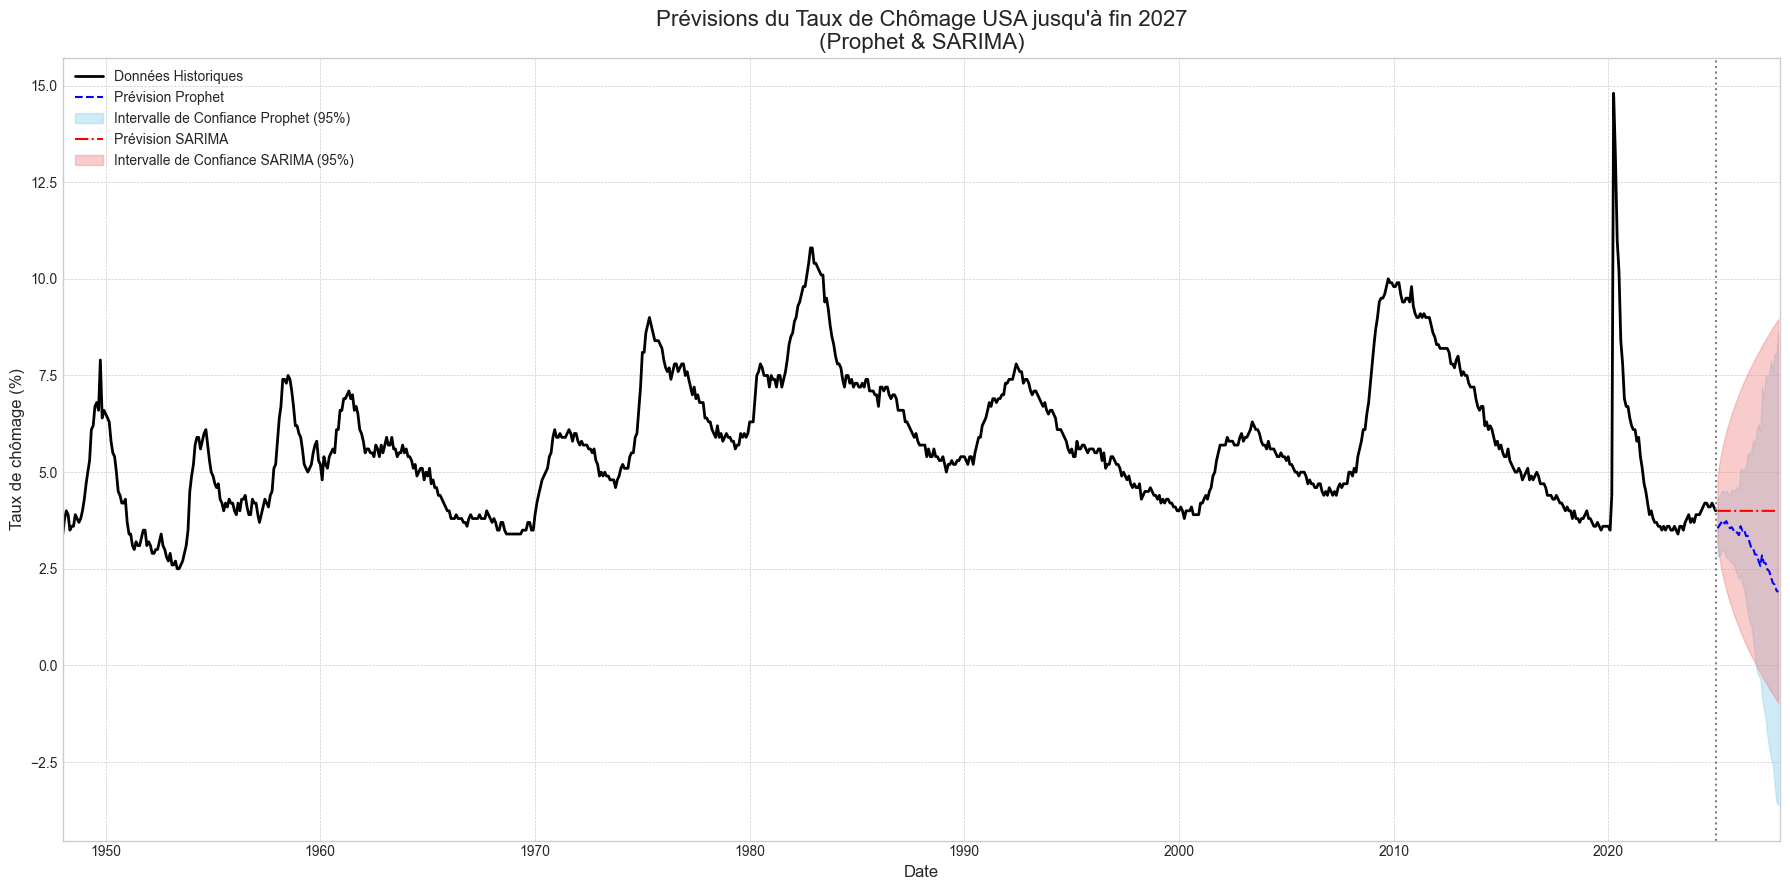


--- Prévisions Prophet (dernières lignes + futures) ---
            ds      yhat  yhat_lower  yhat_upper
920 2024-09-01  3.467541    2.759736    4.244370
921 2024-10-01  3.483409    2.775424    4.257291
922 2024-11-01  3.475939    2.754309    4.230338
923 2024-12-01  3.489371    2.794652    4.243381
924 2025-01-01  3.508910    2.724452    4.251976
925 2025-02-01  3.550318    2.820907    4.330357
926 2025-03-01  3.606259    2.822564    4.333469
927 2025-04-01  3.682978    2.912878    4.477040
928 2025-05-01  3.747553    3.004155    4.526946
929 2025-06-01  3.674187    2.920418    4.458285
930 2025-07-01  3.732181    2.777889    4.521192
931 2025-08-01  3.628383    2.777352    4.448631
932 2025-09-01  3.547455    2.691804    4.406430
933 2025-10-01  3.576516    2.660248    4.548792
934 2025-11-01  3.501985    2.617730    4.499304
935 2025-12-01  3.512851    2.504004    4.550647
936 2026-01-01  3.431008    2.342395    4.614527
937 2026-02-01  3.369002    2.239916    4.589450
938 2026-03-

In [128]:
from prophet import Prophet
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
import statsmodels.api as sm

if 'chomage_usa' not in locals():
    print("Variable 'chomage_usa' non trouvée. Création de données factices pour la démonstration.")
    date_rng = pd.date_range(start='1990-01-01', end='2023-12-01', freq='MS')
    trend = np.linspace(8, 4, len(date_rng))
    seasonal = 1.5 * np.sin(np.linspace(0, (2023-1990+1)*2*np.pi, len(date_rng)))
    cyclical = 1 * np.cos(np.linspace(0, (2023-1990+1)/8*2*np.pi, len(date_rng)))
    noise = np.random.normal(0, 0.5, len(date_rng))
    data = np.maximum(2.0, trend + seasonal + cyclical + noise)

    chomage_usa = pd.DataFrame(data, index=date_rng, columns=['UNRATE'])
    chomage_usa.index.name = 'observation_date'

chomage_usa_reset = chomage_usa.reset_index()
df_prophet_input = chomage_usa_reset[['observation_date', 'UNRATE']].rename(
    columns={'observation_date': 'ds', 'UNRATE': 'y'}
)
df_prophet_input['ds'] = pd.to_datetime(df_prophet_input['ds'])

print("\n--- Entraînement et prévision avec Prophet ---")
model_prophet = Prophet(
    changepoint_prior_scale=0.5,
    changepoint_range=0.95,
    n_changepoints=50,
    seasonality_prior_scale=10,
    seasonality_mode='multiplicative',
    yearly_seasonality=20,
)
model_prophet.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model_prophet.add_seasonality(name='economic_cycle', period=365.25*8, fourier_order=3)
model_prophet.fit(df_prophet_input)

last_historical_date = df_prophet_input['ds'].max()
target_forecast_end_date = pd.Timestamp('2027-12-01') 

if last_historical_date.day == 1: 
    start_for_range = last_historical_date + pd.DateOffset(months=1)
else: 
    start_for_range = (last_historical_date.replace(day=1) + pd.DateOffset(months=1))

periods_to_2027_prophet = len(pd.date_range(start=start_for_range,
                                            end=target_forecast_end_date,
                                            freq='MS'))
print(f"Prophet: Dernière date historique: {last_historical_date.strftime('%Y-%m-%d')}")
print(f"Prophet: Date de fin de prévision cible: {target_forecast_end_date.strftime('%Y-%m-%d')}")
print(f"Prophet: Nombre de périodes à prévoir: {periods_to_2027_prophet}")


future_prophet = model_prophet.make_future_dataframe(periods=periods_to_2027_prophet, freq='MS')
forecast_prophet = model_prophet.predict(future_prophet)

print("\n--- Entraînement et prévision avec SARIMA/ARIMA ---")
df_sarima_input = df_prophet_input.copy() 
df_sarima_input.set_index('ds', inplace=True) 

auto_model_sarima = auto_arima(df_sarima_input['y'], seasonal=True, m=12,
                               trace=False, 
                               stepwise=True,
                               max_p=5, max_q=5,
                               suppress_warnings=True,
                               error_action="ignore")
print("\nRésumé du modèle auto_arima:")
print(auto_model_sarima.summary())

p, d, q = auto_model_sarima.order
P, D, Q, m = auto_model_sarima.seasonal_order if hasattr(auto_model_sarima, 'seasonal_order') and auto_model_sarima.seasonal_order[3] > 0 else (0, 0, 0, 0)

if m > 0:
    model_sarima = sm.tsa.SARIMAX(df_sarima_input['y'], order=(p, d, q), seasonal_order=(P, D, Q, m))
    model_type_sarima = "SARIMA"
else:
    model_sarima = sm.tsa.ARIMA(df_sarima_input['y'], order=(p, d, q))
    model_type_sarima = "ARIMA"

print(f"\nEntraînement du modèle {model_type_sarima} final...")
results_sarima = model_sarima.fit(disp=False)
print(results_sarima.summary())

steps_to_2027_sarima = periods_to_2027_prophet

print(f"SARIMA: Nombre de pas à prévoir: {steps_to_2027_sarima}")

forecast_sarima_obj = results_sarima.get_forecast(steps=steps_to_2027_sarima)
forecast_mean_sarima = forecast_sarima_obj.predicted_mean
forecast_ci_sarima = forecast_sarima_obj.conf_int()

forecast_index_sarima = pd.date_range(start=last_historical_date + pd.offsets.MonthBegin(1),
                                      periods=steps_to_2027_sarima, freq='MS')


print("\n--- Génération du graphique combiné ---")
plt.figure(figsize=(18, 9))

plt.plot(df_prophet_input['ds'], df_prophet_input['y'], label='Données Historiques', color='black', linewidth=2)

prophet_future_mask = forecast_prophet['ds'] > last_historical_date
plt.plot(forecast_prophet.loc[prophet_future_mask, 'ds'],
         forecast_prophet.loc[prophet_future_mask, 'yhat'],
         label='Prévision Prophet', color='blue', linestyle='--')
plt.fill_between(forecast_prophet.loc[prophet_future_mask, 'ds'],
                 forecast_prophet.loc[prophet_future_mask, 'yhat_lower'],
                 forecast_prophet.loc[prophet_future_mask, 'yhat_upper'],
                 color='skyblue', alpha=0.4, label='Intervalle de Confiance Prophet (95%)')

plt.plot(forecast_index_sarima, forecast_mean_sarima,
         label=f'Prévision {model_type_sarima}', color='red', linestyle='-.')
plt.fill_between(forecast_index_sarima,
                 forecast_ci_sarima.iloc[:, 0],
                 forecast_ci_sarima.iloc[:, 1],
                 color='lightcoral', alpha=0.4, label=f'Intervalle de Confiance {model_type_sarima} (95%)')

plt.title(f"Prévisions du Taux de Chômage USA jusqu'à fin {target_forecast_end_date.year}\n(Prophet & {model_type_sarima})", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Taux de chômage (%)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axvline(last_historical_date, color='gray', linestyle=':', linewidth=1.5, label='Début de la prévision')

plot_start_date = df_prophet_input['ds'].min()
plt.xlim([plot_start_date, target_forecast_end_date + pd.DateOffset(months=1)]) 
plt.tight_layout()
plt.show()

print("\n--- Prévisions Prophet (dernières lignes + futures) ---")
print(forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(periods_to_2027_prophet + 5))

sarima_forecast_df = pd.DataFrame({
    'ds': forecast_index_sarima,
    f'{model_type_sarima}_prediction': forecast_mean_sarima,
    f'{model_type_sarima}_lower_ci': forecast_ci_sarima.iloc[:, 0],
    f'{model_type_sarima}_upper_ci': forecast_ci_sarima.iloc[:, 1]
})
print(f"\n--- Prévisions {model_type_sarima} ---")
print(sarima_forecast_df.head())
print(sarima_forecast_df.tail())

print(f"\n--- Métriques {model_type_sarima} (sur données d'entraînement) ---")
y_real_sarima = df_sarima_input['y'].iloc[d:] 
y_pred_sarima_fitted = results_sarima.fittedvalues.iloc[d:]

min_len = min(len(y_real_sarima), len(y_pred_sarima_fitted))
y_real_sarima = y_real_sarima[-min_len:]
y_pred_sarima_fitted = y_pred_sarima_fitted[-min_len:]

if len(y_real_sarima) > 0:
    mae_sarima = mean_absolute_error(y_real_sarima, y_pred_sarima_fitted)
    rmse_sarima = np.sqrt(mean_squared_error(y_real_sarima, y_pred_sarima_fitted))
    mape_sarima = np.mean(np.abs((y_real_sarima - y_pred_sarima_fitted) / y_real_sarima)) * 100
    r2_sarima = r2_score(y_real_sarima, y_pred_sarima_fitted)

    print(f"MAE ({model_type_sarima}): {mae_sarima:.3f}")
    print(f"RMSE ({model_type_sarima}): {rmse_sarima:.3f}")
    print(f"MAPE ({model_type_sarima}): {mape_sarima:.2f}%")
    print(f"R² Score ({model_type_sarima}): {r2_sarima:.3f}")
else:
    print(f"Pas assez de données pour calculer les métriques {model_type_sarima} après différenciation.")

print("\n--- Métriques Prophet (sur données d'entraînement) ---")
y_true_prophet = df_prophet_input['y'].values
y_pred_prophet_fitted = forecast_prophet['yhat'][:len(y_true_prophet)]

mae_prophet = mean_absolute_error(y_true_prophet, y_pred_prophet_fitted)
rmse_prophet = np.sqrt(mean_squared_error(y_true_prophet, y_pred_prophet_fitted))
mape_prophet = np.mean(np.abs((y_true_prophet - y_pred_prophet_fitted) / y_true_prophet)) * 100
r2_prophet = r2_score(y_true_prophet, y_pred_prophet_fitted)

print(f"MAE (Prophet): {mae_prophet:.3f}")
print(f"RMSE (Prophet): {rmse_prophet:.3f}")
print(f"MAPE (Prophet): {mape_prophet:.3f}%")
print(f"R² Score (Prophet): {r2_prophet:.3f}")